In [2]:
import pandas as pd

In [4]:
df=pd.read_csv("Social_Network_Ads.csv")
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [5]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [6]:
df.size

2000

In [7]:
df.shape

(400, 5)

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
df.loc[df["Gender"]=="Male","Gender"]=0
df.loc[df["Gender"]=="Female","Gender"]=1

In [11]:
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
5,15728773,0,27,58000,0
6,15598044,1,27,84000,0
7,15694829,1,32,150000,1
8,15600575,0,25,33000,0
9,15727311,1,35,65000,0


In [18]:
count=0
for i in range(0,400):
    a=df.loc[i]
    if(a["Purchased"]==0):
        count=count+1
print(count)

257


In [19]:
p=count/400
print(p)

0.6425


In [20]:
count=0
for i in range(0,400):
    a=df.loc[i]
    if(a["Purchased"]==1):
        count=count+1
print(count)

143


In [21]:
p=count/400
print(p)

0.3575


In [23]:
count=0
for i in range(0,400):
    a=df.loc[i]
    if(a["Gender"]==0):
        count=count+1
print("Total Males : ",count)

Total Males :  196


In [24]:
count=0
for i in range(0,400):
    a=df.loc[i]
    if(a["Gender"]==1):
        count=count+1
print("Total Females : ",count)

Total Females :  204


In [30]:
count=0
for i in range(0,400):
    a=df.loc[i]
    if((a["Gender"]==0)and(a["Purchased"]==1)):
        count=count+1
print("Total Males who purchased : ",count)
print("Probability That a male will purchase is : ",count/143)

Total Males who purchased :  66
Probability That a male will purchase is :  0.46153846153846156


In [31]:
count=0
for i in range(0,400):
    a=df.loc[i]
    if((a["Gender"]==1)and(a["Purchased"]==1)):
        count=count+1
print("Total Females who purchased : ",count)
print("Probability That a Female will purchase is : ",count/143)

Total Females who purchased :  77
Probability That a Female will purchase is :  0.5384615384615384


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:4].values
Y = df.iloc[:, 4].values
print("X Shape : ",X.shape)
print("Y Shape : ",Y.shape)

X Shape :  (400, 4)
Y Shape :  (400,)


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [39]:
corr=df.corr()
corr

,User ID,Gender,Age,EstimatedSalary,Purchased,0
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120,NaN
Gender,0.025249,1.000000,0.073741,0.060435,0.042469,NaN
Age,-0.000721,0.073741,1.000000,0.155238,0.622454,NaN
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083,NaN
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
import seaborn as sb

<AxesSubplot:>

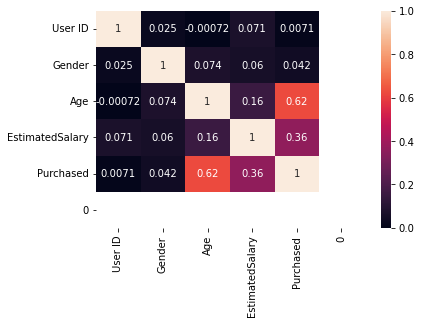

In [41]:
sb.heatmap(corr,annot=True)

In [58]:
basemodel= LogisticRegression() 
basemodel.fit(X_train,Y_train) 
print("Training accuracy:", basemodel.score(X_train,Y_train)*100) 

Training accuracy: 77.5


In [59]:
Y_predict= basemodel.predict(X_test) 
print("Testing accuracy:", basemodel.score(X_test,Y_test)*100) 

Testing accuracy: 82.5


In [62]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
cm=confusion_matrix(Y_test,Y_predict)
print(cm)

[[56  2]
 [12 10]]


In [65]:
print("TP : ",cm[0][0])
print("FP : ",cm[0][1])
print("TN : ",cm[1][1])
print("FN : ",cm[1][0])

TP :  56
FP :  2
TN :  10
FN :  12


In [63]:
print("Precision : ",precision_score(Y_test,Y_predict))
print("Recall : ",recall_score(Y_test,Y_predict))

Precision :  0.8333333333333334
Recall :  0.45454545454545453
